# Self - Attention

<img style="float: left; width:200px;" src="self_attention.png">

$Attention(Q,K,V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$

Q = query - o que estou procurando


K = key - o que tenho a oferecer


V = value - o que eu realmente ofereço

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Exemplo de tradução
# Frase de entrada (inglês)
input_sentence = "Eu estou muito feliz"
# Frase traduzida (português)
output_sentence =  "I am very happy"

In [3]:
L, d_k, d_v = 4, 8, 8

> Artigo traduz de inglês para alemão e utiliza um embedding $d_{model} = 512$.

In [4]:
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [5]:
q.var(), k.var(), np.matmul(q, k.T).var()

(0.5675252114413597, 0.830695207221572, 6.182488840627621)

In [6]:
scaled = np.matmul(q,k.T) / math.sqrt(d_k)
scaled.var()

0.7728111050784525

In [7]:
mask = np.tril(np.ones((L,L)))

mask[mask==0] = -np.infty
mask[mask==1] = 0

mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [8]:
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.shape[-1]
    scaled = np.matmul(q, k.T) / math.sqrt(d_k)
    if mask is not None:
        scaled = scaled + mask
    attention = softmax(scaled)
    out = np.matmul(attention, v)
    return out, attention

In [9]:
def plot_attention_heatmap(attention_matrix, input_sentence, output_sentence):
    plt.figure(figsize=(8, 6))
    plt.imshow(attention_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(len(output_sentence)), output_sentence)
    plt.yticks(np.arange(len(input_sentence)), input_sentence)
    plt.xlabel('Output')
    plt.ylabel('Input')
    plt.title('Attention Heatmap')
    plt.show()

In [10]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[-1.04581298e+00 -7.39318304e-01  7.37447398e-03  1.05984264e+00
  -7.05034572e-01  6.37537433e-01  6.21060118e-01  2.97734798e-01]
 [-9.36894442e-01  7.99547854e-01 -7.78477561e-01  4.69404352e-01
  -3.55311701e-01  1.23093234e-02 -1.62176559e+00  1.55280286e+00]
 [ 7.74412187e-02 -4.62316090e-01 -1.96524661e-01  1.04138821e+00
   5.66428780e-01  4.74630307e-01 -1.14483850e+00  5.61024436e-01]
 [-3.79434984e-01 -1.03922096e-01 -5.47251097e-01  5.91614688e-01
   1.07935488e+00 -9.96025396e-01  1.80152495e-01 -2.52949791e-04]]
K
 [[-1.83770631 -0.36115797 -0.55408583 -0.4780967  -0.62763636  0.02990943
  -1.09123187  0.2385645 ]
 [-0.20275068 -0.75051085 -0.19799616 -0.43008093  0.4480587  -1.53939446
  -0.06036109 -0.05454223]
 [-0.65113113  0.02870705  0.96670747 -0.66889895  0.03536229 -0.87213652
  -0.65252043  0.47126892]
 [ 1.89904276 -2.30716503  1.00441029  0.43651334  1.18939596 -1.01113075
   1.63935796 -0.60801335]]
V
 [[ 0.8716505  -1.14079615 -0.21182086 -0.51210334 -0.

In [11]:
new_v_input, attention_input = scaled_dot_product_attention(q, k, v, mask=None)

In [12]:
new_v_output, attention_output = scaled_dot_product_attention(q, k, v, mask=mask)

In [38]:
q=new_v_output
k=new_v_input
v=new_v_input

new_v_inp_out, attention_inp_out = scaled_dot_product_attention(q, k, v)

## Encoder Self-Attention

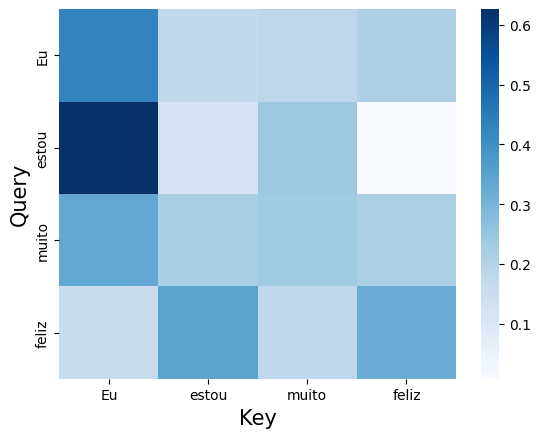

In [33]:
sns.heatmap(attention_input, xticklabels=input_sentence.split(), yticklabels=input_sentence.split(), cmap="Blues") 
plt.ylabel('Query', fontsize = 15) 
plt.xlabel('Key', fontsize = 15) 
plt.show()

## Decoder Self-Attention

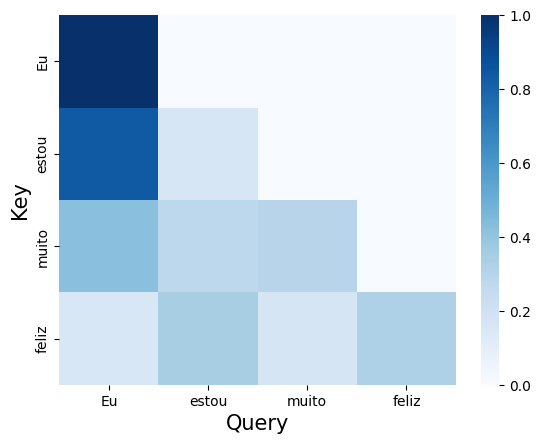

In [35]:
sns.heatmap(attention_output, xticklabels=input_sentence.split(), yticklabels=input_sentence.split(), cmap="Blues") 
plt.ylabel('Key', fontsize = 15) 
plt.xlabel('Query', fontsize = 15) 
plt.show()

## Encoder-Decoder Attention

In [43]:
attention_inp_out

array([[0.26967614, 0.2480339 , 0.23801657, 0.24427339],
       [0.26521793, 0.2376969 , 0.23988682, 0.25719835],
       [0.25056362, 0.22987476, 0.25018895, 0.26937268],
       [0.25173947, 0.20695589, 0.24926542, 0.29203922]])

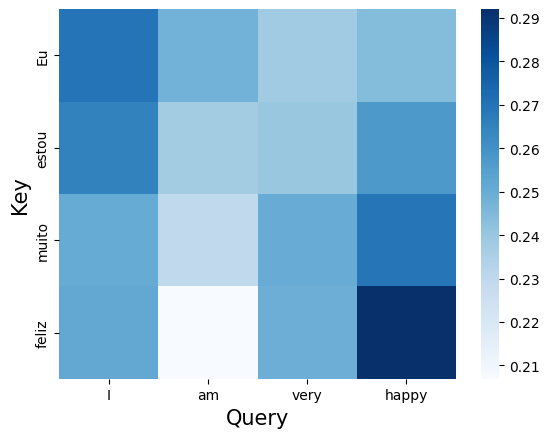

In [42]:
sns.heatmap(attention_inp_out, xticklabels=output_sentence.split(), yticklabels=input_sentence.split(), cmap="Blues") 
plt.ylabel('Key', fontsize = 15) 
plt.xlabel('Query', fontsize = 15) 
plt.show()

Referência:
- https://github.com/ajhalthor